# Investigation tmdb-movies dataset 

In [27]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [23]:
#Exploring dataset
movies_df = pd.read_csv('tmdb-movies.csv')
print(movies_df.head(1))
print(movies_df.info())
print(movies_df.duplicated().sum())
movies_df.isnull().sum()

       id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]
<class 'pandas.core.frame.DataFra

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Cleaning dataset

In [24]:
movies_df.drop_duplicates(inplace = True)
print('duplicated sum :', movies_df.duplicated().sum())
movies_df.fillna(' ', inplace = True) # all columns types that have null values are strings
movies_df.isnull().sum()

duplicated sum : 0


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Research Question 1 (Which movies genres are most popular and least popular !)

In [25]:
# first step we should get all genres individually
genres = movies_df['genres']
g_list = []

for g in genres:
    if('|' in g):
        splited_g = g.split('|')
        for x in splited_g:
            g_list.append(x)
    elif(g != ' '):
        g_list.append(g)
        
g_list = list(dict.fromkeys(g_list)) #removing duplicates
g_dict = dict.fromkeys(g_list, 0) #


for g in g_list: #counting genres individually
    for x in genres:
        if(g in x or g == x):
            g_dict[g] += 1

print(g_dict)
print('*' * 125)
print('It seems that the most popular genre is :', max(g_dict, key=g_dict.get)) 
print('It seems that the least popular genre is :', min(g_dict, key=g_dict.get))


{'Action': 2384, 'Adventure': 1471, 'Science Fiction': 1229, 'Thriller': 2907, 'Fantasy': 916, 'Crime': 1354, 'Western': 165, 'Drama': 4760, 'Family': 1231, 'Animation': 699, 'Comedy': 3793, 'Mystery': 810, 'Romance': 1712, 'War': 270, 'History': 334, 'Music': 408, 'Horror': 1637, 'Documentary': 520, 'TV Movie': 167, 'Foreign': 188}
*****************************************************************************************************************************
It seems that the most popular genre is : Drama
It seems that the least popular genre is : Western


### Research Question 2  ( What kinds of properties are associated with movies that have high revenues!)

                    id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.014351 -0.141341 -0.099235 -0.088368   -0.035555   
popularity   -0.014351    1.000000  0.545481  0.663360  0.139032    0.800828   
budget       -0.141341    0.545481  1.000000  0.734928  0.191300    0.632719   
revenue      -0.099235    0.663360  0.734928  1.000000  0.162830    0.791174   
runtime      -0.088368    0.139032  0.191300  0.162830  1.000000    0.163273   
vote_count   -0.035555    0.800828  0.632719  0.791174  0.163273    1.000000   
vote_average -0.058391    0.209517  0.081067  0.172541  0.156813    0.253818   
release_year  0.511393    0.089806  0.115904  0.057070 -0.117187    0.107962   
budget_adj   -0.189008    0.513555  0.968963  0.706446  0.221127    0.587062   
revenue_adj  -0.138487    0.609085  0.622531  0.919109  0.175668    0.707941   

              vote_average  release_year  budget_adj  revenue_adj  
id               -0.058391      0.511393   -0.18900

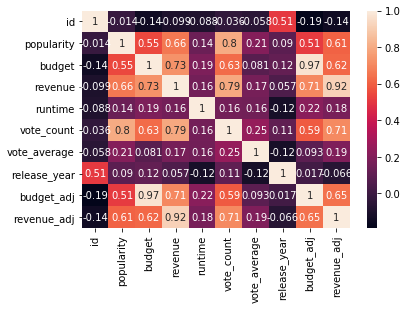

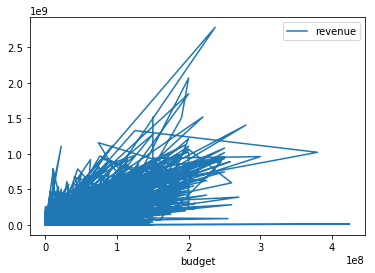

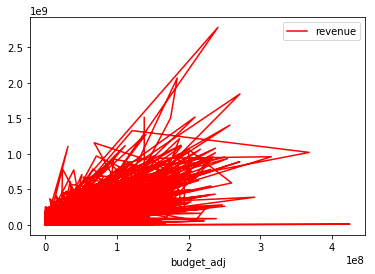

In [46]:
print(movies_df.corr())
sn.heatmap(movies_df.corr(), annot=True)
movies_df.plot.line(x = 'budget', y = 'revenue')
movies_df.plot.line(x = 'budget_adj', y = 'revenue', color = 'r')

<a id='conclusions'></a>
## Conclusions
######  It seems that the most popular genre is : Drama.
######  It seems that the least popular genre is : Western.
######  It seems that there's a positive relation between revenue and (budget_adj, budget, vote_count).

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0